In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 

In [5]:
CAvideos = pd.read_csv("CAvideos.csv")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
CAvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [7]:
df=CAvideos[['views', 'likes']]
corr = df.corr()

In [8]:
print(corr)

          views     likes
views  1.000000  0.827283
likes  0.827283  1.000000


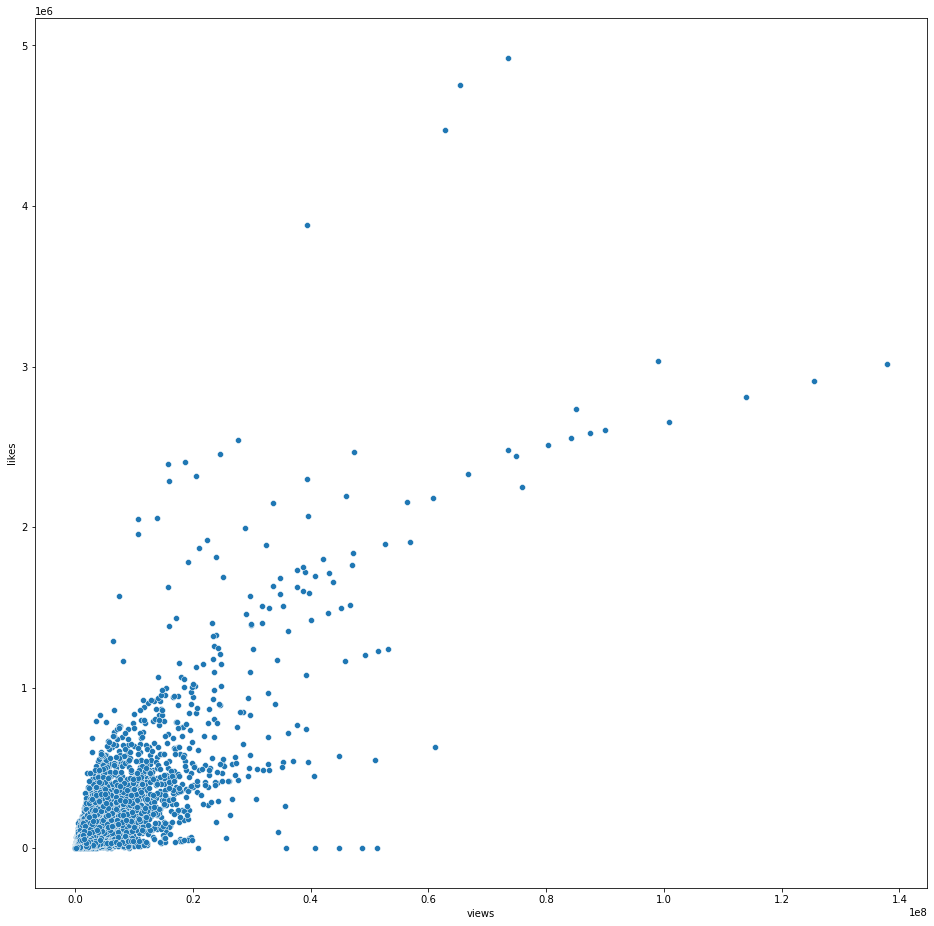

In [9]:
matplotlib.pyplot.figure(figsize=(16,16))
sns.scatterplot(x=df["views"], y=df["likes"])

From the corr we can see that like and comments have a good correlation. most views that cross 0.2 threashold has over 10000 likes
The curve follows like = k*sqrt(comments) where K is a constant

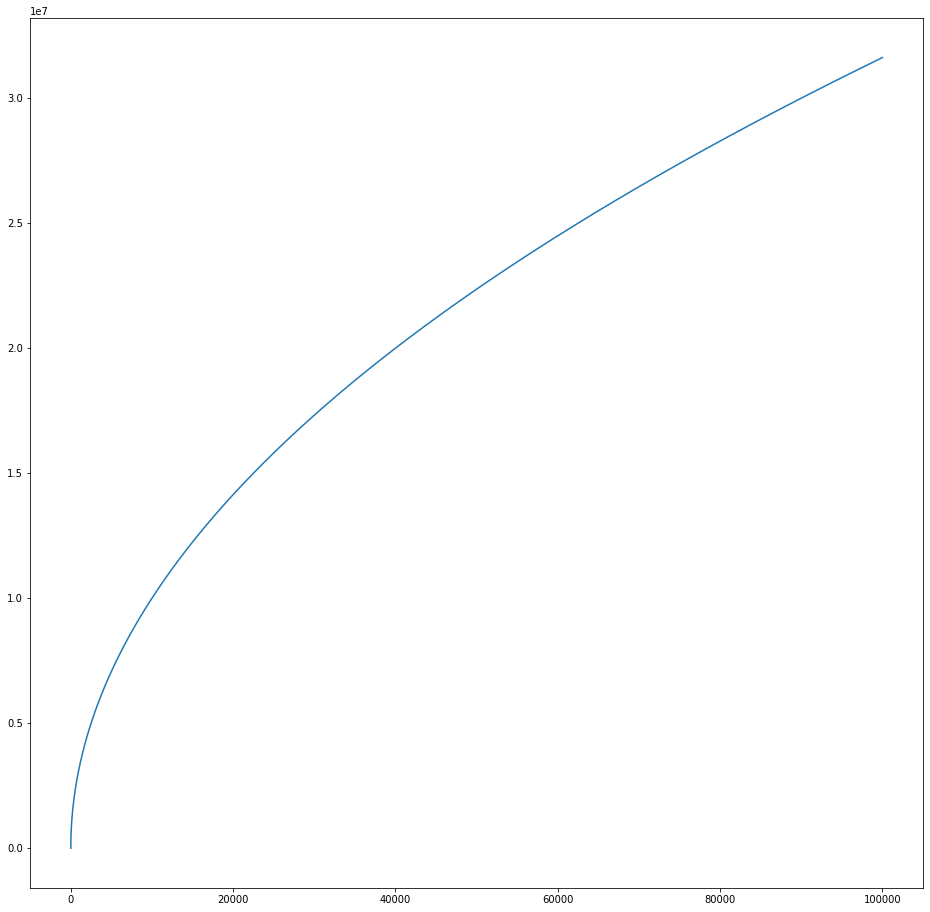

In [10]:
from matplotlib import pyplot as plt
import numpy as np
K = 100000
x = np.arange(K)
y = K * np.sqrt(x)
plt.figure(figsize=(16,16))
plt.plot(x,y)

In [19]:
col_list = ['views', 'likes', 'dislikes', 'comment_count']
us = pd.read_csv('USvideos.csv', usecols=col_list) #USA, remaking the dataframe in the same format as the others
ca = pd.read_csv('CAvideos.csv', usecols=col_list) #Canada
de = pd.read_csv('DEvideos.csv', usecols=col_list) #Germany
fr = pd.read_csv('FRvideos.csv', usecols=col_list) #France
gb = pd.read_csv('GBvideos.csv', usecols=col_list) #United Kingdom 
ind = pd.read_csv('INvideos.csv', usecols=col_list) #India
jp = pd.read_csv('JPvideos.csv', usecols=col_list) #Japan
kr = pd.read_csv('KRvideos.csv', usecols=col_list) #South Korea
mx = pd.read_csv('MXvideos.csv', usecols=col_list) #Mexico
ru = pd.read_csv('RUvideos.csv', usecols=col_list) #Russia

df_list = [us, ca, de, fr, gb, ind, jp, kr, mx, ru]
df_name_list = ['United States', 'Canada', 'Germany', 'France', 'United Kingdom', 'India',
                'Japan', 'South Korea', 'Mexico', 'Russia']

Master_df = pd.DataFrame(columns=['views', 'likes', 'dislikes', 'comment_count', 'country'])

for i in range (len(df_list)):
    add = np.full((len(df_list[i])),df_name_list[i])
    df_list[i]['country'] = add
    Master_df = pd.merge(Master_df,df_list[i], how='outer')


In [20]:
Master_df.sample(5)

,views,likes,dislikes,comment_count,country
2599,5169,27,0,4,United States
118714,71373,1256,106,201,Germany
152184,56010,484,36,296,France
296401,75512,5001,31,350,Mexico
181126,3011598,45248,1213,1307,United Kingdom


In [21]:
Master_df.corr()

,views,likes,dislikes,comment_count
views,1.000000,0.777796,0.421653,0.510030
likes,0.777796,1.000000,0.453710,0.794490
dislikes,0.421653,0.453710,1.000000,0.705182
comment_count,0.510030,0.794490,0.705182,1.000000


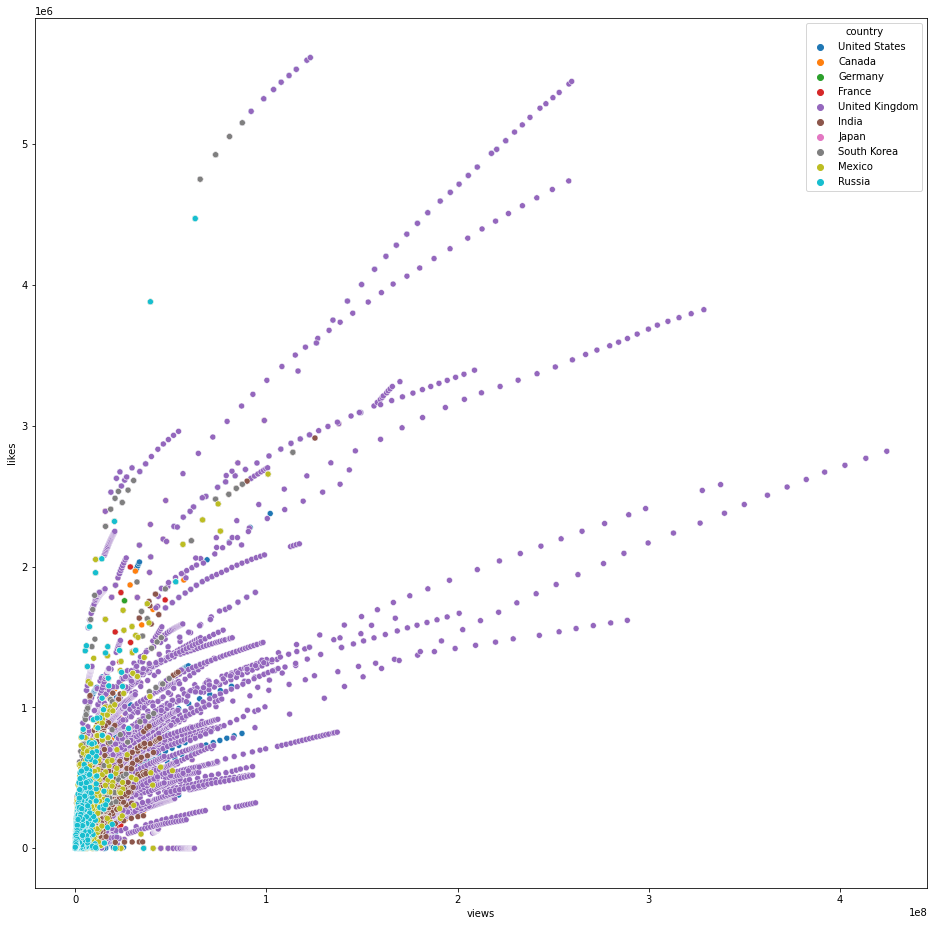

In [15]:
matplotlib.pyplot.figure(figsize=(16,16))
sns.scatterplot(x=Master_df["views"], y=Master_df["likes"], hue=Master_df["country"])

This trend is observed to all of the countries. Less viewed videos may have a supporter group who gives like even if the view is small. And general high views come from normal users who doesn't like that much. So like/view ration should fall for large viewed videos.

In [36]:
views = Master_df["views"]
likes = Master_df["likes"]
ratio = likes/views
Master_df["ratio"] = ratio

In [17]:
Master_df.head()

,views,likes,country,ratio
0,748374,57527,United States,0.076869
1,2418783,97185,United States,0.040179
2,3191434,146033,United States,0.045758
3,343168,10172,United States,0.029641
4,2095731,132235,United States,0.063097


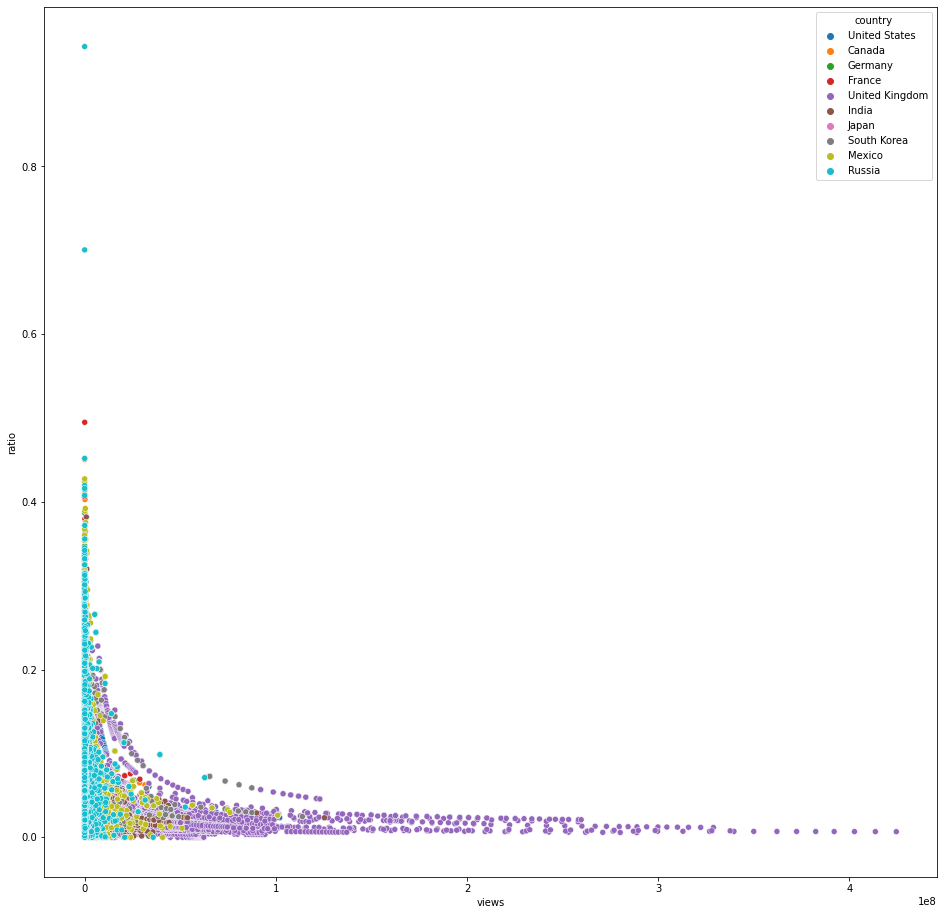

In [18]:
matplotlib.pyplot.figure(figsize=(16,16))
sns.scatterplot(x=Master_df["views"], y=Master_df["ratio"], hue=Master_df["country"])

So we can see that when view gets higher the ratio of like/view declines.

## View and Dislikes

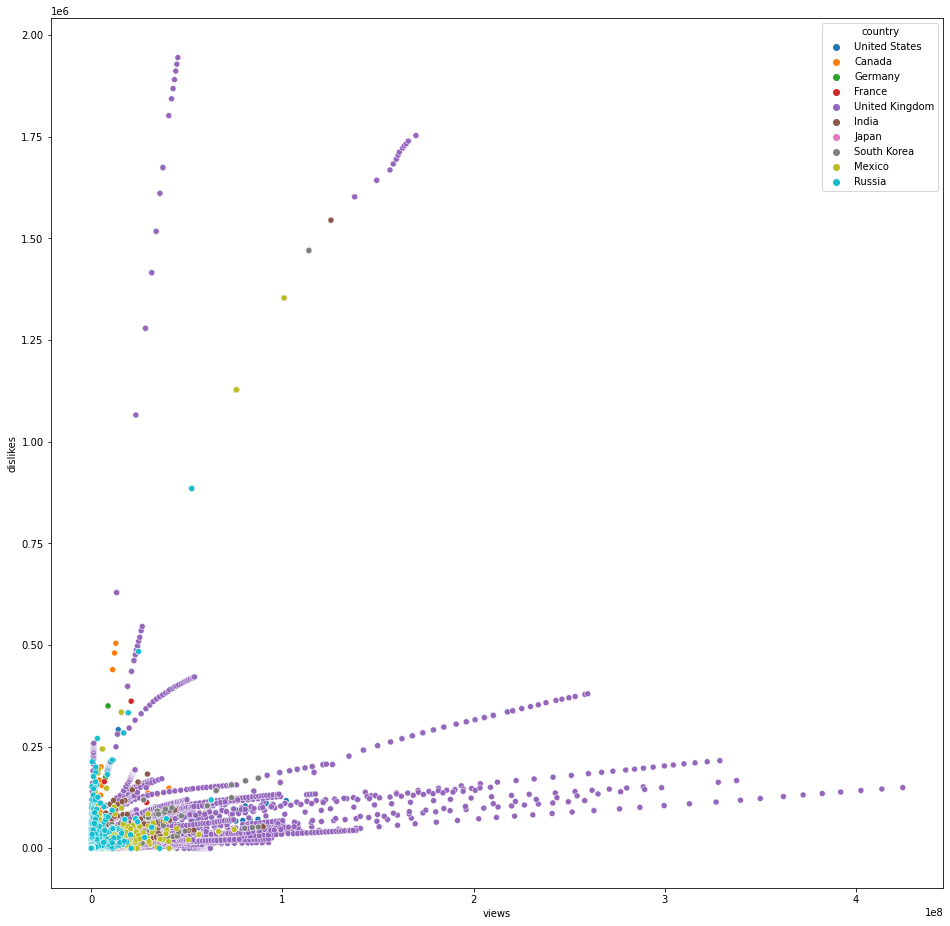

In [23]:
matplotlib.pyplot.figure(figsize=(16,16))
sns.scatterplot(x=Master_df["views"], y=Master_df["dislikes"], hue=Master_df["country"])

Observation: Small view size has more dislikes where larger view has less dislikes

In [32]:
dislikes = Master_df.groupby('dislikes')['country'].value_counts().reset_index(level=0).rename(columns={'Country': 'Country count'}, index={'index': 'Country'})
dislikes

,dislikes,country
country,,
Japan,0,1679
South Korea,0,1640
Russia,0,1339
France,0,1233
Mexico,0,994
...,...,...
United Kingdom,1868756,1
United Kingdom,1890743,1
United Kingdom,1911836,1


In [44]:
views = Master_df["views"]
dislikesS = Master_df["dislikes"]
ratio = dislikesS/views
Master_df["dislike ratio"] = ratio


In [45]:
Master_df.head()

,views,likes,dislikes,comment_count,country,dislike ratio,ratio
0,748374,57527,2966,15954,United States,0.003963,0.076869
1,2418783,97185,6146,12703,United States,0.002541,0.040179
2,3191434,146033,5339,8181,United States,0.001673,0.045758
3,343168,10172,666,2146,United States,0.001941,0.029641
4,2095731,132235,1989,17518,United States,0.000949,0.063097


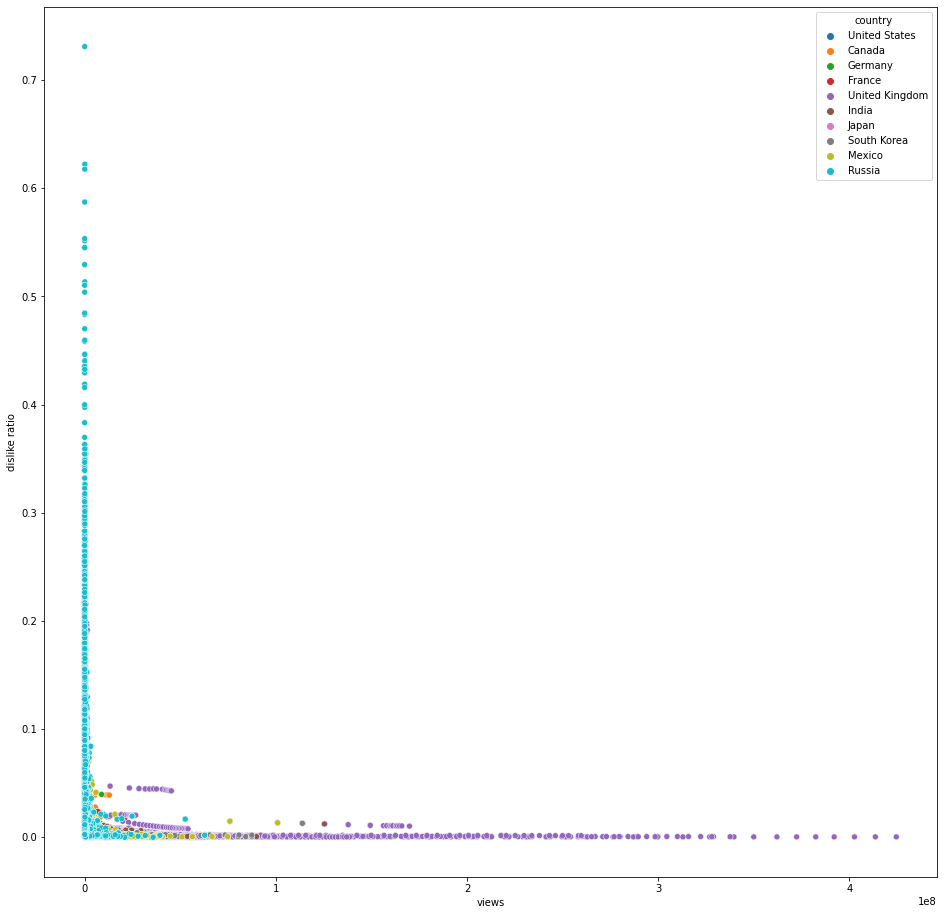

In [46]:
matplotlib.pyplot.figure(figsize=(16,16))
sns.scatterplot(x=Master_df["views"], y=Master_df["dislike ratio"], hue=Master_df["country"])


lowest view has highest dislike/view ratio

## Like dislike ration against views

In [55]:
Master_df['like/dislike'] = (Master_df['ratio'] / Master_df['dislike ratio'])

In [56]:
Master_df.head()

,views,likes,dislikes,comment_count,country,dislike ratio,ratio,like/dislike
0,748374,57527,2966,15954,United States,0.003963,0.076869,19.395482
1,2418783,97185,6146,12703,United States,0.002541,0.040179,15.812724
2,3191434,146033,5339,8181,United States,0.001673,0.045758,27.352126
3,343168,10172,666,2146,United States,0.001941,0.029641,15.273273
4,2095731,132235,1989,17518,United States,0.000949,0.063097,66.483157


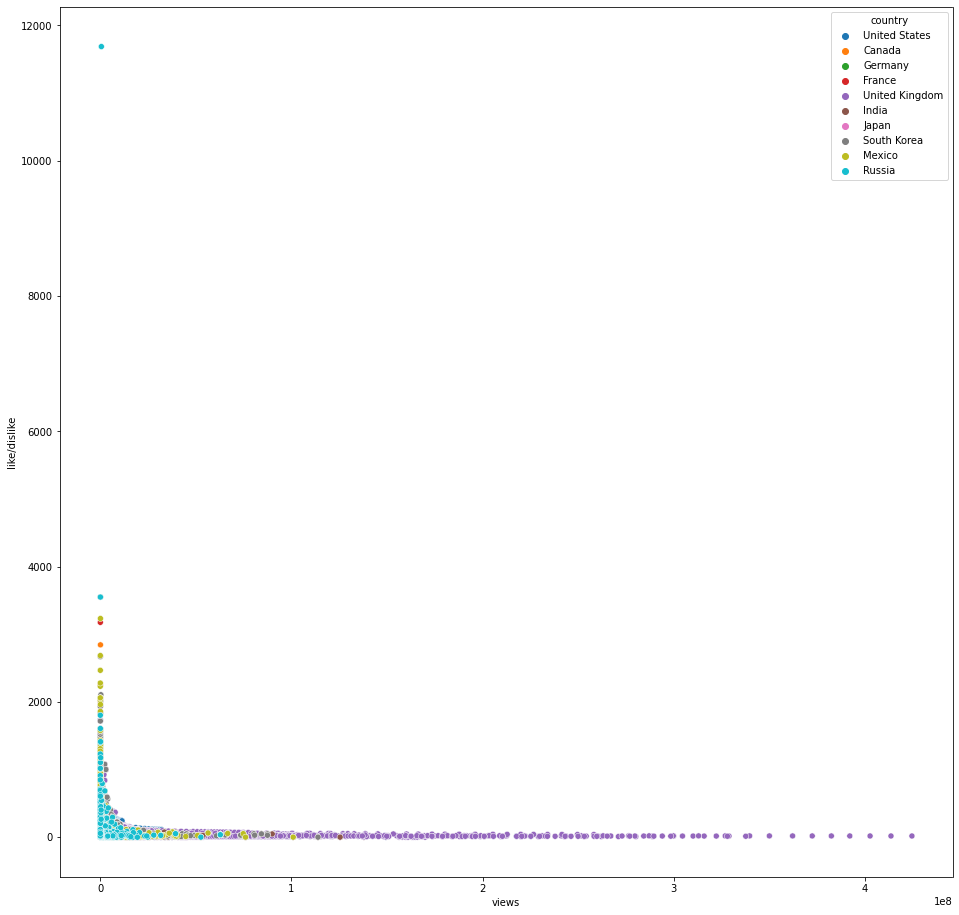

In [57]:
matplotlib.pyplot.figure(figsize=(16,16))
sns.scatterplot(x=Master_df["views"], y=Master_df["like/dislike"], hue=Master_df["country"])

In [58]:
Master_df.corr()


,views,likes,dislikes,comment_count,dislike ratio,ratio,like/dislike
views,1.000000,0.777796,0.421653,0.510030,-0.010682,-0.035289,-0.017261
likes,0.777796,1.000000,0.453710,0.794490,-0.000364,0.102621,0.044725
dislikes,0.421653,0.453710,1.000000,0.705182,0.106914,0.005881,-0.031328
comment_count,0.510030,0.794490,0.705182,1.000000,0.034397,0.084475,0.016035
dislike ratio,-0.010682,-0.000364,0.106914,0.034397,1.000000,0.106076,-0.079351
ratio,-0.035289,0.102621,0.005881,0.084475,0.106076,1.000000,0.472864
like/dislike,-0.017261,0.044725,-0.031328,0.016035,-0.079351,0.472864,1.000000
